# First looked at our dataset

- Pandas
- Dataframes
- Load the dataset

In [3]:
import pandas as pd

In [34]:
data = pd.read_csv('Customer-Churn.csv')

#type(data)

## The variables (columns) in the dataset.

In [35]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


The column named `Churn` is our target variable.

In [8]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

We have **Class Imbalance**.

The dataset contains both numerical and categorical variables.



In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
numerical_columns = [
    "tenure",
    "MonthlyCharges",
    "TotalCharges",
]
categorical_columns = [
    "customerID",
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
]

In [11]:
target_column = 'Churn'


In [13]:
data.shape

(7043, 12)

The dataset contains 7043 samples and 12 columns.

## Visual Inspection

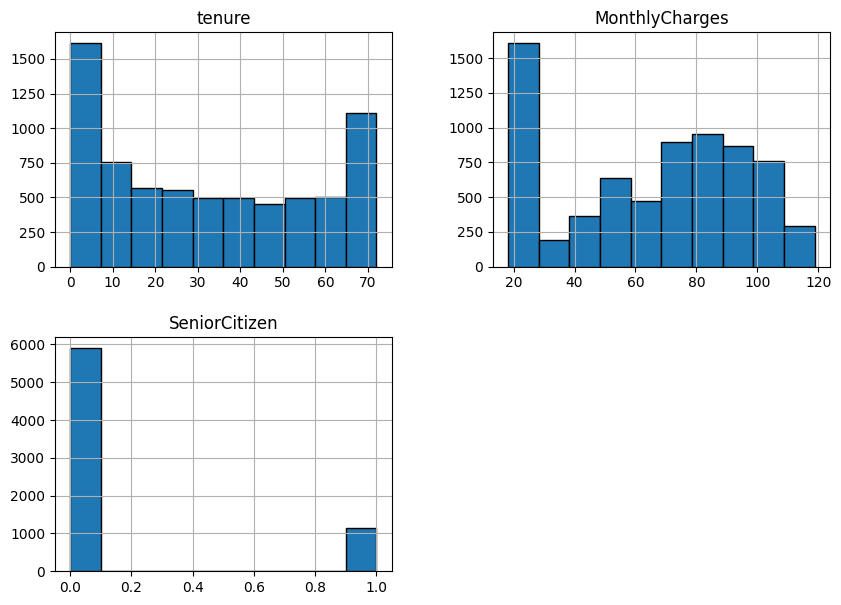

In [17]:
_ = data.hist(figsize=(10,7), edgecolor='black')

Give an explanation!!!!

The range is from 0 to about 75 months.

In [18]:
# Convert 'Senior Citizen' to a categorical column

data['SeniorCitizen'] = data['SeniorCitizen'].astype('category')

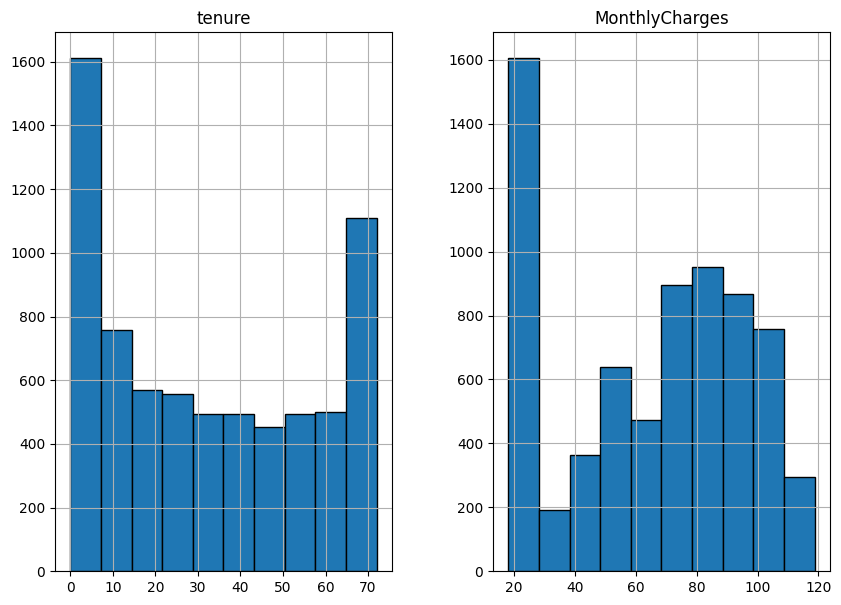

In [19]:
_ = data.hist(figsize=(10,7), edgecolor='black')

In [20]:
# Categorical

data.gender.value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

## First Model with scikit-learn
 - Linear Regression

In [21]:
df = pd.read_csv('housing_3.csv')
df.head()

,price,size,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1



## Separate the features and the target

In [22]:
target_name = 'price'
target = df[target_name]

In [25]:
target = target/1_000_000

In [26]:
target

0      13.30000
1      12.25000
2      12.25000
3      12.21500
4      11.41000
         ...   
540     1.82000
541     1.76715
542     1.75000
543     1.75000
544     1.75000
Name: price, Length: 545, dtype: float64

In [27]:
features = df.drop(columns=[target_name])
features.head()

,size,bedrooms,bathrooms
0,7420,4,2
1,8960,4,4
2,9960,3,2
3,7500,4,2
4,7420,4,1


In [29]:
features.shape

(545, 3)

## Fit a model and make predictions

`.fit()` method

In [30]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()

model.fit(features,target)

LinearRegression()

In [31]:
target_predicted = model.predict(features)

In [32]:
target_predicted[:5]

array([ 7.03662715, 10.39202079,  7.59186451,  7.06692817,  5.65057766])

In [33]:
target[:5]

0    13.300
1    12.250
2    12.250
3    12.215
4    11.410
Name: price, dtype: float64

### Model Performance